In [3]:
# we will download the cats and dogs dataset and unzip them
# after this run, set your data_dir variable: data_dir = 'Cat_Dog_data'
# so all the data is available. so path to your training data becomes `Cat_Dog_data/train`
# path to test is `Cat_Dog_data/test`

!wget -c https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip

# remove existing directories
!rm -r Cat_Dog_data __MACOSX || true
!unzip -qq Cat_Dog_data.zip

--2020-01-21 15:59:53--  https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.46.142
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.46.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580495262 (554M) [application/zip]
Saving to: ‘Cat_Dog_data.zip’

Cat_Dog_data.zip    100%[===================>] 553.60M  98.1MB/s    in 6.3s    

2020-01-21 15:59:59 (88.3 MB/s) - ‘Cat_Dog_data.zip’ saved [580495262/580495262]

rm: cannot remove 'Cat_Dog_data': No such file or directory
rm: cannot remove '__MACOSX': No such file or directory


In [0]:
# imports
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
from torchvision import datasets, transforms
from torch.utils.data import Dataset
import glob
from PIL import Image
from torch.utils.data import DataLoader

image_size = (224, 224)
mean = [0.485, 0.456, 0.406]
std  = [0.229, 0.224, 0.225]
# transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

In [0]:
data_dir = 'Cat_Dog_data'
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5], 
                                                            [0.5, 0.5, 0.5])])
test_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5], 
                                                            [0.5, 0.5, 0.5])])

##_______________data loader________________
class datasetloader(Dataset):
    
    def __init__(self, path, transform=None):
        self.classes   = os.listdir(path)
        self.path      = [f"{path}/{className}" for className in self.classes]
        self.file_list = [glob.glob(f"{x}/*") for x in self.path]
        self.transform = transform
        
        files = []
        for i, className in enumerate(self.classes):
            print(i,className)
            for fileName in self.file_list[i]:
                files.append([i, className, fileName])
        self.file_list = files
        files = None
        
    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        fileName = self.file_list[idx][2]
        classCategory = self.file_list[idx][0]
        im = Image.open(fileName)
        if self.transform:
            im = self.transform(im)
        return im, classCategory

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

In [0]:
def imshow(source):
    plt.figure(figsize=(10,10))
    imt = (source.view(-1, image_size[0], image_size[0]))
    imt = imt.numpy().transpose([1,2,0])
    imt = (std * imt + mean).clip(0,1)
    plt.subplot(1,2,2)
    plt.imshow(imt)

0 dog
1 cat
0 dog
1 cat


torch.Size([3, 224, 224])

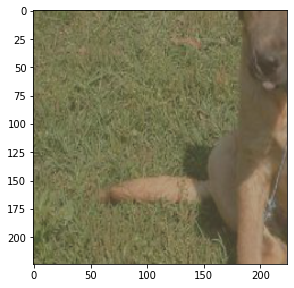

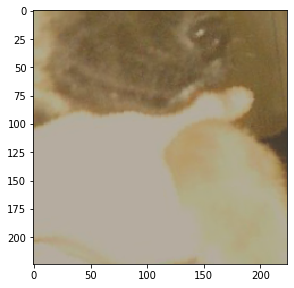

In [26]:
train_dataset = datasetloader(data_dir + '/train', transform=train_transforms)
test_dataset = datasetloader(data_dir + '/test', transform=test_transforms)
imshow(train_dataset[0][0])
imshow(test_dataset[2][0])
test_dataset[2][0].shape

In [0]:
k = torch.zeros(size = (50,3,224,224))
lb = torch.zeros(50)

In [0]:
for i in range(50):
  a,b = train_dataset.__getitem__(i)
  k[i]=a
  lb[i]=b


In [8]:
!rm /content/Cat_Dog_data/test/cat <.DS_Store>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `rm /content/Cat_Dog_data/test/cat <.DS_Store>'


In [9]:
!ls -al

total 566920
drwxr-xr-x 1 root root      4096 Jan 21 16:00 .
drwxr-xr-x 1 root root      4096 Jan 21 15:57 ..
drwxr-xr-x 4 root root      4096 Mar 19  2018 Cat_Dog_data
-rw-r--r-- 1 root root 580495262 Apr  8  2018 Cat_Dog_data.zip
drwxr-xr-x 1 root root      4096 Jan 13 16:38 .config
drwxrwxr-x 3 root root      4096 Apr  5  2018 __MACOSX
drwxr-xr-x 1 root root      4096 Jan 13 16:38 sample_data


In [10]:
!sudo find / -name ".DS_Store" -depth -exec rm {} \;

find: warning: you have specified the -depth option after a non-option argument -name, but options are not positional (-depth affects tests specified before it as well as those specified after it).  Please specify options before other arguments.



In [11]:
!content/Cat_Dog_data/test/cat 

/bin/bash: content/Cat_Dog_data/test/cat: No such file or directory


In [12]:
!ls -al

total 566920
drwxr-xr-x 1 root root      4096 Jan 21 16:00 .
drwxr-xr-x 1 root root      4096 Jan 21 15:57 ..
drwxr-xr-x 4 root root      4096 Jan 21 16:01 Cat_Dog_data
-rw-r--r-- 1 root root 580495262 Apr  8  2018 Cat_Dog_data.zip
drwxr-xr-x 1 root root      4096 Jan 13 16:38 .config
drwxrwxr-x 3 root root      4096 Apr  5  2018 __MACOSX
drwxr-xr-x 1 root root      4096 Jan 13 16:38 sample_data


In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 53 * 53, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 53 * 53)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
from torch.utils.tensorboard import SummaryWriter

In [16]:
# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/cat_dog_experiment_1')

In [0]:
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg,cmap='plasma')
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))


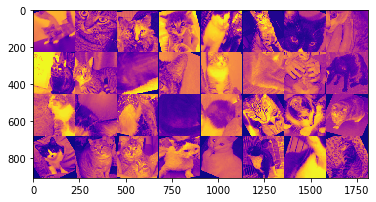

In [42]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# create grid of images
img_grid = torchvision.utils.make_grid(images,normalize=True)

# show images
matplotlib_imshow(img_grid, one_channel=True)

# write to tensorboard
writer.add_image('_cat_dog_images', img_grid)

In [43]:
classes = train_data.classes
print(classes)

['cat', 'dog']


In [44]:
# helper function
def select_n_random(data, labels, n=100):
    '''
    Selects n random datapoints and their corresponding labels from a dataset
    '''
    assert len(data) == len(labels)

    perm = torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

# select random images and their target indices
images, labels = select_n_random(k, lb)

# get the class labels for each image
class_labels = [classes[int(lab)] for lab in labels]

# log embeddings
features = images.view(-1, 224 * 224*3)
writer.add_embedding(features,
                    metadata=class_labels,
                    label_img=images)
writer.close()

In [0]:
def images_to_probs(net, images):
    '''
    Generates predictions and corresponding probabilities from a trained
    network and a list of images
    '''
    output = net(images)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy())
    return preds, [F.softmax(el, dim=0)[i].item() for i, el in zip(preds, output)]


def plot_classes_preds(net, images, labels):
    '''
    Generates matplotlib Figure using a trained network, along with images
    and labels from a batch, that shows the network's top prediction along
    with its probability, alongside the actual label, coloring this
    information based on whether the prediction was correct or not.
    Uses the "images_to_probs" function.
    '''
    preds, probs = images_to_probs(net, images)
    # plot the images in the batch, along with predicted and true labels
    fig = plt.figure(figsize=(12, 48))
    for idx in np.arange(4):
        ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
        matplotlib_imshow(images[idx], one_channel=True)
        ax.set_title("{0}, {1:.1f}%\n(label: {2})".format(
            classes[preds[idx]],
            probs[idx] * 100.0,
            classes[labels[idx]]),

                    color=("green" if preds[idx]==labels[idx].item() else "red"))
    return fig

In [46]:
running_loss = 0.0
for epoch in range(1):  # loop over the dataset multiple times

    for i, data in enumerate(trainloader, 0):

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:    # every 1000 mini-batches...

            # ...log the running loss
            writer.add_scalar('training loss',
                            running_loss / 1000,
                            epoch * len(trainloader) + i)

            # ...log a Matplotlib Figure showing the model's predictions on a
            # random mini-batch
            writer.add_figure('predictions vs. actuals',
                            plot_classes_preds(net, inputs, labels),
                            global_step=epoch * len(trainloader) + i)
            running_loss = 0.0
print('Finished Training')

Finished Training


In [0]:
# 1. gets the probability predictions in a test_size x num_classes Tensor
# 2. gets the preds in a test_size Tensor
# takes ~10 seconds to run
class_probs = []
class_preds = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        output = net(images)
        class_probs_batch = [F.softmax(el, dim=0) for el in output]
        _, class_preds_batch = torch.max(output, 1)

        class_probs.append(class_probs_batch)
        class_preds.append(class_preds_batch)

test_probs = torch.cat([torch.stack(batch) for batch in class_probs])
test_preds = torch.cat(class_preds)

# helper function
def add_pr_curve_tensorboard(class_index, test_probs, test_preds, global_step=0):
    '''
    Takes in a "class_index" from 0 to 9 and plots the corresponding
    precision-recall curve
    '''
    tensorboard_preds = test_preds == class_index
    tensorboard_probs = test_probs[:, class_index]

    writer.add_pr_curve(classes[class_index],
                        tensorboard_preds,
                        tensorboard_probs,
                        global_step=global_step)
    writer.close()

# plot all the pr curves
for i in range(len(classes)):
    add_pr_curve_tensorboard(i, test_probs, test_preds)

In [48]:
!zip -r /content/runs runs

  adding: runs/ (stored 0%)
  adding: runs/cat_dog_experiment_1/ (stored 0%)
  adding: runs/cat_dog_experiment_1/projector_config.pbtxt (deflated 73%)
  adding: runs/cat_dog_experiment_1/events.out.tfevents.1579624497.6f1da5791ac9.122.1 (deflated 96%)
  adding: runs/cat_dog_experiment_1/00000/ (stored 0%)
  adding: runs/cat_dog_experiment_1/00000/default/ (stored 0%)
  adding: runs/cat_dog_experiment_1/00000/default/sprite.png (deflated 0%)
  adding: runs/cat_dog_experiment_1/00000/default/tensors.tsv (deflated 92%)
  adding: runs/cat_dog_experiment_1/00000/default/metadata.tsv (deflated 96%)
  adding: runs/cat_dog_experiment_1/events.out.tfevents.1579624497.6f1da5791ac9.122.2 (deflated 95%)
  adding: runs/cat_dog_experiment_1/events.out.tfevents.1579622476.6f1da5791ac9.122.0 (deflated 0%)
  adding: runs/cat_dog_experiment_1/events.out.tfevents.1579625680.6f1da5791ac9.122.4 (deflated 93%)
  adding: runs/cat_dog_experiment_1/events.out.tfevents.1579625680.6f1da5791ac9.122.5 (deflated 91

In [0]:
#python main.py --logdir=/home/aimsp/AIMS_GHANA_AMMI_NOTES/4_with_tutors/PyTorch/runsss(1

#python main.py --logdir=/home/aimsp/Downloads/runsss

#cd ~/.local/lib/python3.7/site-packages/tensorboard

